# 小组题目：检测葡萄酒质量

## 小组成员：1-10林可欣、1-09章宸烨、1-11陈晞玟、1-12谢雯瑶、2-01郑柳钰

### 内容简介：来自葡萄牙北部的两个与红色和白色vinho verde葡萄酒样品有关的数据，主要视为分类或回归任务，根据输入变量（理化特性）对葡萄酒质量进行建模 

#### 1.导入数据：

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
#档案的读取
dataset_red = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' #红色葡萄酒数据的读取
data = pd.read_csv(dataset_red, sep=';')
#dataset_white = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'   #白色葡萄酒数据的读取
#data = pd.read_csv(dataset_white, sep=';')

以下的数据处理及代码以红葡萄酒数据为例，白葡萄酒数据的处理也是一样。

#### 2.了解数据：

In [2]:
#查看数据的属性
print("Keys of data:\n", data.keys())
print("Shape of data:\n", data.shape)

Keys of data:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Shape of data:
 (1599, 12)


In [3]:
#查看前20行数据
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
#查看数据类型
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

数据类型均为数字类型，故不做数据类型转换

进行数据可视化，令数据更加直观

Text(0.5, 1.0, 'All input variables with quality')

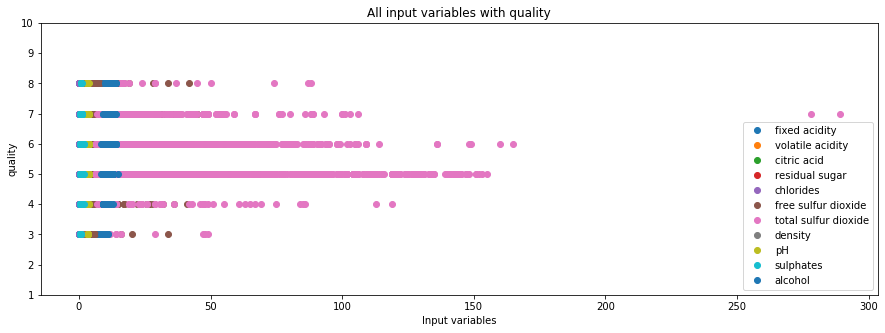

In [6]:
y = data.quality
a = data.drop(columns=['quality'])

fig = plt.figure(figsize=(15,5))

plt.plot( a,y ,'o')
plt.ylabel("quality")
plt.xlabel("Input variables")
plt.yticks([1,2,3,4,5,6,7,8,9,10])
plt.legend(["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density","pH", "sulphates", "alcohol"])
plt.title("All input variables with quality")

#### 3.初步处理数据：

将quality数据进行分类，分成两类：0与1

In [7]:
#quality小于等于5设置为0
t0 = data[data['quality'] >= 7]
t0[['quality']]=1
#quality大于等于6设置为1
t1 = data[data['quality'] < 7]
t1[['quality']]=0

D:\Users\daimaoshou2w\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\daimaoshou2w\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\Users\daimaoshou2w\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [8]:
data=pd.concat([t0,t1])

In [9]:
#再次查看数据
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,1
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,1
62,7.5,0.520,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [10]:
#将目标（y）功能与输入（X）功能分开
y = data.quality
X = data.drop(columns=['quality'])
#drop函数删除，axis：axis=0表示行，axis=1表示列。columns：列名

In [11]:
#设置训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=66)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1119, 11)
y_train shape: (1119,)
X_test shape: (480, 11)
y_test shape: (480,)


#### 4.建立模型：

模型一：线性回归（普通最小二乘法）

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.25
Test set score: 0.20


线性回归模型精度过低，故不考虑该模型。

模型二：决策树

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=11, random_state=42)
tree.fit(X_train, y_train)

print("Train set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

Train set score: 0.994
Test set score: 0.863


决策树模型没有出现过拟合的情况。该模型不需要进行数据处理，是运用在葡萄酒数据中较适合的一种模型。

我们为了提高精度，运用了随机森林模型 

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)

print("Train set score: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.3f} ".format(forest.score(X_test, y_test)))

Train set score: 0.996
Test set score: 0.910 


该模型会比决策树精度更高些，是更合适的一种模型。

模型三：knn模型

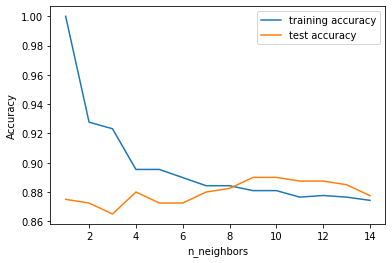

In [16]:
#查询n_neighbors在1-14时为何值时，模型性能最好
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# n_neighbors取值从1到14
neighbors_settings = range(1, 15)
for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 记录训练集精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 记录测试集精度
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

由图可知n_neighbors取8时，knn模型性能较好

In [17]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print("Train set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

Train set score: 0.884
Test set score: 0.882


knn模型精度也较高，相比随机森林模型较低些。

模型四：svm模型

In [18]:
from sklearn.svm import SVC
# 将数据划分为训练+验证集与测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,y, random_state=0)
# 将训练+验证集划分为训练集与验证集
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 在验证集上评估SVC
        score = svm.score(X_valid, y_valid)
        # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 在训练+验证集上重新构建一个模型，并在测试集上进行评估
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 899   size of validation set: 300   size of test set: 400

Best score on validation set: 0.87
Best parameters:  {'C': 10, 'gamma': 1}
Test set score with best parameters: 0.90


通过划分数据集交叉验证svm模型，得出的最佳精度比其他模型略低，数据处理过程也较繁琐，不是最佳的选择。

观察以上各个模型所得出的精度，我们发现随机森林模型是最优的选择。故选择随机森林模型为最终的建模。

#### 5.最终建模以及测试数据： 

对随机森林模型进行微调,使精度更高

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=234)
forest.fit(X_train, y_train)

print("Train set score: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set score:{:.3f} ".format(forest.score(X_test, y_test)))

Train set score: 1.000
Test set score:0.925 


创建新的数据，试运行该模型

In [21]:
X_new = np.array([[ 6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,4.45,0.58,10.5]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 11)


In [22]:
prediction = forest.predict(X_new)
print("Prediction:", prediction)

Prediction: [0]
